In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import itertools
import time

In [2]:
# Distance matrix
distances = np.array([
    [0, 7, 20, 15, 12],
    [10, 0, 6, 14, 18],
    [20, 6, 0, 15, 30],
    [15, 14, 25, 0, 2],
    [12, 18, 30, 2, 0]
])

In [3]:
# coordinates for the places 
coordinates = np.array([
    [4, 3],  # Dorado Park
    [5, 9],  # Khomasdal
    [2, 6],  # Katutura
    [8, 4],  # Eros
    [9, 8]   # Klein Windhoek
])

In [4]:
# Function to calculate the distance between two points
def calculate_distance(point1, point2):
    return np.linalg.norm(point1 - point2)

In [5]:
# Function to calculate total distance of a route
def calculate_total_distance(route, distances):
    total_distance = 0
    for i in range(len(route)):
        total_distance += distances[route[i-1], route[i]]
    return total_distance


In [6]:
# Function to generate a random initial route
def generate_initial_route(number_of_places):
    route = list(range(number_of_places))
    random.shuffle(route)
    return route

In [7]:
# Function to find a neighbour by swapping two places
def find_neighbour(route):
    neighbour = route.copy()
    a, b = random.sample(range(len(route)), 2)
    neighbour[a], neighbour[b] = neighbour[b], neighbour[a]
    return neighbour


In [8]:
# Hill climbing algorithm
def hill_climbing(distances, max_iterations=1000):
    current_route = generate_initial_route(len(distances))
    current_distance = calculate_total_distance(current_route, distances)
    iterations = 0
    
    while iterations < max_iterations:
        neighbour = find_neighbour(current_route)
        neighbour_distance = calculate_total_distance(neighbour, distances)
        
        if neighbour_distance < current_distance:
            current_route, current_distance = neighbour, neighbour_distance
        
        iterations += 1
    
    return current_route, current_distance

In [9]:
# Function to run hill climbing on various test cases with different numbers of places
def run_hill_climbing_test(num_places_list, distances):
    results = {}
    for num_places in num_places_list:
        start_time = time.time()
        best_route, best_distance = hill_climbing(distances[:num_places, :num_places])
        end_time = time.time()
        results[num_places] = {'best_route': best_route, 'best_distance': best_distance, 'runtime': end_time - start_time}
    return results


In [10]:
# Function to calculate the optimal solution exhaustively for a small number of cities
def calculate_optimal_solution_exhaustively(distances):
    min_distance = float('inf')
    optimal_route = None
    num_places = len(distances)
    for permutation in itertools.permutations(range(num_places)):
        total_distance = calculate_total_distance(permutation, distances)
        if total_distance < min_distance:
            min_distance = total_distance
            optimal_route = permutation
    return optimal_route, min_distance

In [11]:
# Function to compare the total distance found by the algorithm with the optimal distance
def compare_with_optimal(results, distances):
    optimal_route, optimal_distance = calculate_optimal_solution_exhaustively(distances)
    print(f"Optimal Distance: {optimal_distance}")
    for num_places, result in results.items():
        print(f"Number of Places: {num_places}")
        print(f"Best Distance Found: {result['best_distance']}")
        print(f"Improvement over Optimal: {optimal_distance - result['best_distance']}")
        print(f"Runtime: {result['runtime']} seconds")
        print()


In [12]:
# Function to analyze the impact of the number of iterations on the quality of the solution found
def analyze_iteration_impact(num_iterations_list, distances):
    results = {}
    for num_iterations in num_iterations_list:
        best_route, best_distance = hill_climbing(distances, max_iterations=num_iterations)
        results[num_iterations] = {'best_route': best_route, 'best_distance': best_distance}
    return results

In [13]:
# Visualization function
def visualize_route(route, coordinates):
    plt.figure(figsize=(10, 6))
    # Plot the points
    for i in range(len(route)):
        plt.plot(coordinates[route[i-1:i+1], 0], coordinates[route[i-1:i+1], 1], 'ro-')
    for i, txt in enumerate(route):
        plt.annotate(txt, (coordinates[i][0], coordinates[i][1]))
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Route Visualization')
    plt.show()

In [14]:
# Test the hill climbing algorithm with different numbers of places
num_places_list = [5, 10, 15]
results = run_hill_climbing_test(num_places_list, distances)


In [15]:
# Compare the total distance found by the algorithm with the optimal distance
compare_with_optimal(results, distances)

Optimal Distance: 42
Number of Places: 5
Best Distance Found: 42
Improvement over Optimal: 0
Runtime: 0.005609035491943359 seconds

Number of Places: 10
Best Distance Found: 42
Improvement over Optimal: 0
Runtime: 0.00506281852722168 seconds

Number of Places: 15
Best Distance Found: 42
Improvement over Optimal: 0
Runtime: 0.005434989929199219 seconds



In [16]:
# Analyze the impact of the number of iterations on the quality of the solution found
num_iterations_list = [100, 500, 1000, 2000]
iteration_results = analyze_iteration_impact(num_iterations_list, distances)
for num_iterations, result in iteration_results.items():
    print(f"Number of Iterations: {num_iterations}")
    print(f"Best Distance Found: {result['best_distance']}")
    print()

Number of Iterations: 100
Best Distance Found: 42

Number of Iterations: 500
Best Distance Found: 42

Number of Iterations: 1000
Best Distance Found: 42

Number of Iterations: 2000
Best Distance Found: 42



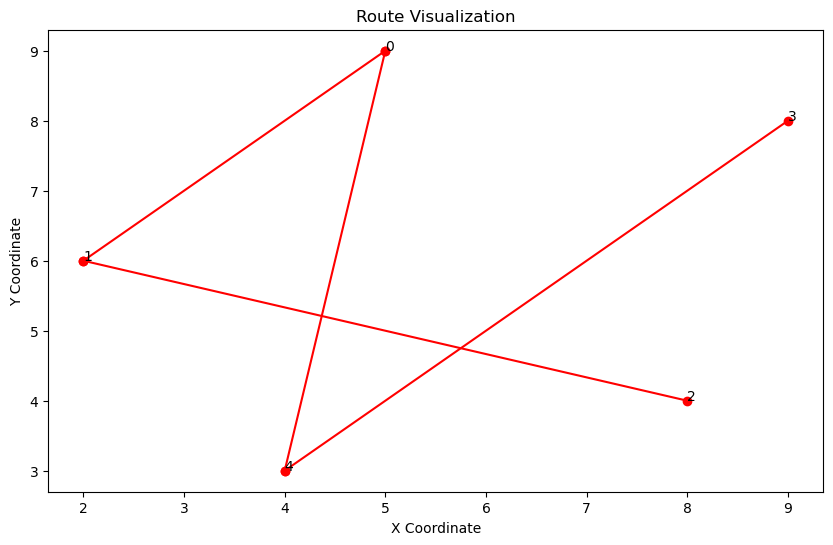

In [17]:
# Visualize the route
visualize_route(results[5]['best_route'], coordinates)